In [4]:
pip install numpy pandas matplotlib scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [6]:
# Load the data
df = pd.read_csv('stock_data.csv')

# Check the structure of the data
print(df.head())

# Extract 'Date' and 'Close' price
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

       Date   Open   High    Low  Close    Volume  Name
0  1/3/2006  39.69  41.22  38.79  40.91  24232729  AABA
1  1/4/2006  41.22  41.90  40.77  40.97  20553479  AABA
2  1/5/2006  40.93  41.73  40.85  41.53  12829610  AABA
3  1/6/2006  42.88  43.57  42.80  43.21  29422828  AABA
4  1/9/2006  43.10  43.66  42.82  43.42  16268338  AABA


In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Define a function to create a dataset with look-back
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create the dataset
look_back = 60
X, y = create_dataset(scaled_data, look_back)

# Reshape the data to be compatible with LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [8]:
# Split the data
split = int(X.shape[0] * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [9]:
# Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))


D:\udemy2\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 0.0117 - val_loss: 5.2490e-04
Epoch 2/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0012 - val_loss: 4.7638e-04
Epoch 3/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0011 - val_loss: 8.4575e-04
Epoch 4/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 5/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 9.1824e-04 - val_loss: 8.7914e-04
Epoch 6/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 9.1714e-04 - val_loss: 4.0447e-04
Epoch 7/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 8.5348e-04 - val_loss: 6.4055e-04
Epoch 8/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 7.8277e-04 - val_loss: 4.3989e-04
Epoch 9/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 7.4792e-04 - val_loss: 6.7201e-04
Epoch 10/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 7.9581e-04 - val_loss: 0.0016
Epoch 11/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 7.8941e-04 - val_loss: 4.3578e-0

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


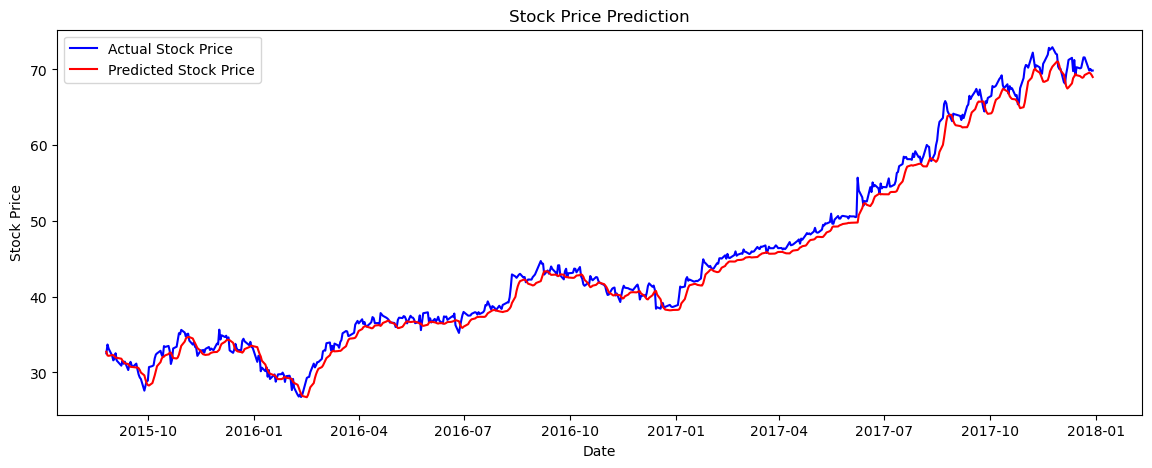

In [11]:
# Predict the stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Plot the results
plt.figure(figsize=(14,5))
plt.plot(df.index[split+look_back:], df['Close'].values[split+look_back:], color='blue', label='Actual Stock Price')
plt.plot(df.index[split+look_back:], predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [14]:
df.to_csv('stock_price_lstm_model.csv', index=False)

In [15]:
from IPython.display import FileLink
FileLink('stock_price_lstm_model.csv')

D:\udemy2\stock_price_lstm_model.csv